In [1]:
import pandas as pd
import geopandas as gpd
import altair as alt
from altair.expr import datum
import json
alt.renderers.enable('notebook')
alt.data_transformers.enable('json')

DataTransformerRegistry.enable('json')

In [2]:
def group_country_shapes(country_list, dhs_data):
    country_data = list()
    for c in country_list:
        curr_country = dhs_data[dhs_data.dhscc == c]
        country_data.append(curr_country)
        
    return country_data

def plot_country(country_data, country_geo):
    country_json = json.loads(country_geo.to_json())
    country_shape = alt.Data(values=country_json)
    
    geo_chart = alt.Chart(country_shape).mark_geoshape(
        stroke='black',
        strokeWidth=1
    ).properties(
        width=160,
        height=160
    )
    
    country_plot = alt.Chart(country_data).mark_point(
        size=1
    ).encode(
        alt.X('longnum',
             scale=alt.Scale(zero=False)
        ),
        alt.Y('latnum',
             scale=alt.Scale(zero=False)
        ),
        color='dhscc:N'
    )
    
    return geo_chart + country_plot

In [3]:
dhs_info = '../data/dhs_info_for_climate_extraction_26sept2018.csv'
dhs_df = pd.read_csv(dhs_info, sep=',')
relevant_dhs = dhs_df.loc[:, ['longnum', 'latnum', 'dhscc']]

geo_info = '../data/shapefiles/Africa_SHP/sub_saharan_africa.shp'
geo_df = gpd.read_file(geo_info)

# Goes through the dataset, grouping each country's entry
country_data = group_country_shapes(geo_df.dhscc.unique(), relevant_dhs)

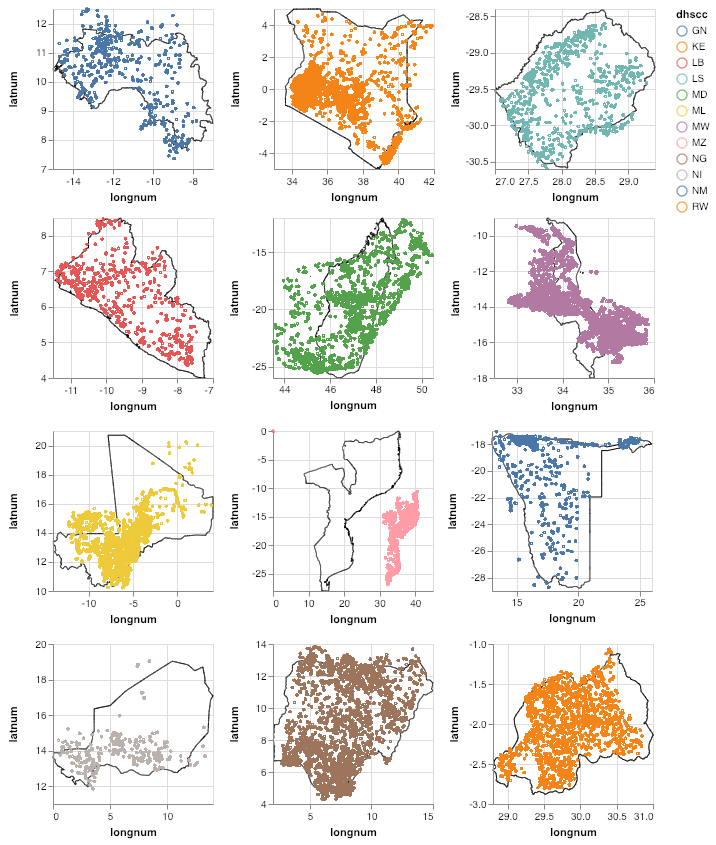

In [4]:
temp = alt.hconcat(plot_country(country_data[12], geo_df[geo_df.dhscc == country_data[12].dhscc.unique()[0]]),
                   plot_country(country_data[13], geo_df[geo_df.dhscc == country_data[13].dhscc.unique()[0]]))
row = alt.hconcat(temp, plot_country(country_data[14], geo_df[geo_df.dhscc == country_data[14].dhscc.unique()[0]]))
plot = row

# Create the second layer
temp = alt.hconcat(plot_country(country_data[15], geo_df[geo_df.dhscc == country_data[15].dhscc.unique()[0]]),
                   plot_country(country_data[16], geo_df[geo_df.dhscc == country_data[16].dhscc.unique()[0]]))
row = alt.hconcat(temp, plot_country(country_data[17], geo_df[geo_df.dhscc == country_data[17].dhscc.unique()[0]]))
plot = alt.vconcat(plot, row)

# Create the third layer
temp = alt.hconcat(plot_country(country_data[18], geo_df[geo_df.dhscc == country_data[18].dhscc.unique()[0]]),
                   plot_country(country_data[19], geo_df[geo_df.dhscc == country_data[19].dhscc.unique()[0]]))
row = alt.hconcat(temp, plot_country(country_data[20], geo_df[geo_df.dhscc == country_data[20].dhscc.unique()[0]]))
plot = alt.vconcat(plot, row)

temp = alt.hconcat(plot_country(country_data[21], geo_df[geo_df.dhscc == country_data[21].dhscc.unique()[0]]),
                   plot_country(country_data[22], geo_df[geo_df.dhscc == country_data[22].dhscc.unique()[0]]))
row = alt.hconcat(temp, plot_country(country_data[23], geo_df[geo_df.dhscc == country_data[23].dhscc.unique()[0]]))
plot = alt.vconcat(plot, row)

plot

In [5]:
geo_info = '../data/shapefiles/natural_earth_vector/10m_cultural/sub_saharan_africa.shp'
geo_df = gpd.read_file(geo_info)

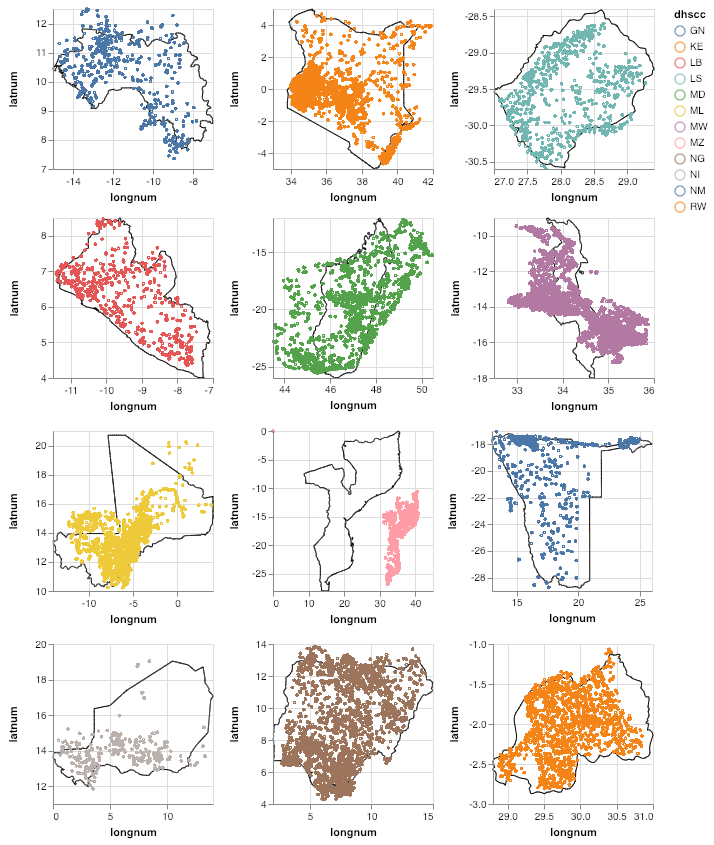

In [6]:
temp = alt.hconcat(plot_country(country_data[12], geo_df[geo_df.dhscc == country_data[12].dhscc.unique()[0]]),
                   plot_country(country_data[13], geo_df[geo_df.dhscc == country_data[13].dhscc.unique()[0]]))
row = alt.hconcat(temp, plot_country(country_data[14], geo_df[geo_df.dhscc == country_data[14].dhscc.unique()[0]]))
plot = row

# Create the second layer
temp = alt.hconcat(plot_country(country_data[15], geo_df[geo_df.dhscc == country_data[15].dhscc.unique()[0]]),
                   plot_country(country_data[16], geo_df[geo_df.dhscc == country_data[16].dhscc.unique()[0]]))
row = alt.hconcat(temp, plot_country(country_data[17], geo_df[geo_df.dhscc == country_data[17].dhscc.unique()[0]]))
plot = alt.vconcat(plot, row)

# Create the third layer
temp = alt.hconcat(plot_country(country_data[18], geo_df[geo_df.dhscc == country_data[18].dhscc.unique()[0]]),
                   plot_country(country_data[19], geo_df[geo_df.dhscc == country_data[19].dhscc.unique()[0]]))
row = alt.hconcat(temp, plot_country(country_data[20], geo_df[geo_df.dhscc == country_data[20].dhscc.unique()[0]]))
plot = alt.vconcat(plot, row)

temp = alt.hconcat(plot_country(country_data[21], geo_df[geo_df.dhscc == country_data[21].dhscc.unique()[0]]),
                   plot_country(country_data[22], geo_df[geo_df.dhscc == country_data[22].dhscc.unique()[0]]))
row = alt.hconcat(temp, plot_country(country_data[23], geo_df[geo_df.dhscc == country_data[23].dhscc.unique()[0]]))
plot = alt.vconcat(plot, row)

plot

In [7]:
geo_info = '../data/shapefiles/africa/sub_saharan_africa.shp'
geo_df = gpd.read_file(geo_info)

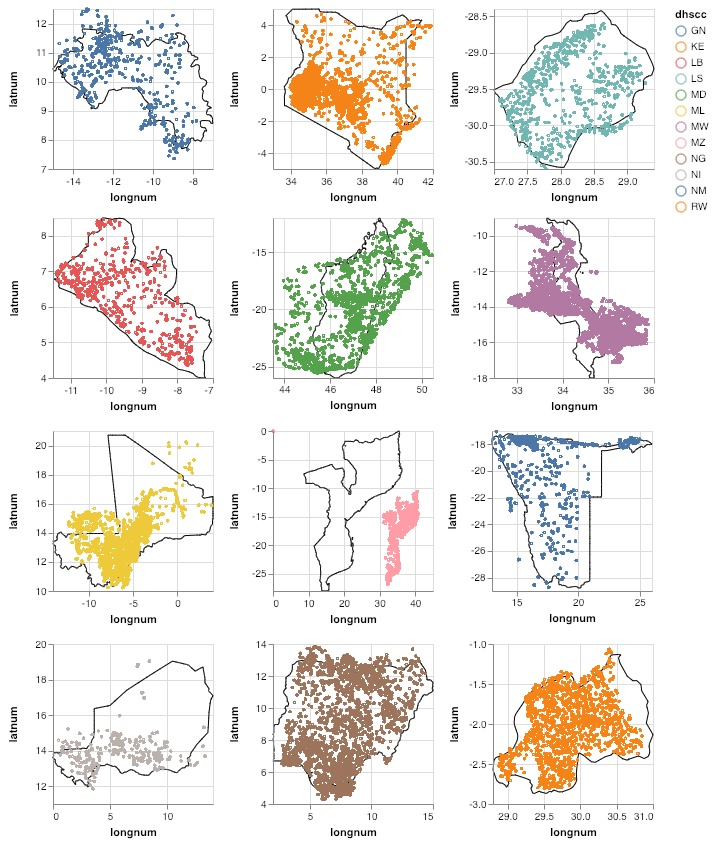

In [8]:
temp = alt.hconcat(plot_country(country_data[12], geo_df[geo_df.dhscc == country_data[12].dhscc.unique()[0]]),
                   plot_country(country_data[13], geo_df[geo_df.dhscc == country_data[13].dhscc.unique()[0]]))
row = alt.hconcat(temp, plot_country(country_data[14], geo_df[geo_df.dhscc == country_data[14].dhscc.unique()[0]]))
plot = row

# Create the second layer
temp = alt.hconcat(plot_country(country_data[15], geo_df[geo_df.dhscc == country_data[15].dhscc.unique()[0]]),
                   plot_country(country_data[16], geo_df[geo_df.dhscc == country_data[16].dhscc.unique()[0]]))
row = alt.hconcat(temp, plot_country(country_data[17], geo_df[geo_df.dhscc == country_data[17].dhscc.unique()[0]]))
plot = alt.vconcat(plot, row)

# Create the third layer
temp = alt.hconcat(plot_country(country_data[18], geo_df[geo_df.dhscc == country_data[18].dhscc.unique()[0]]),
                   plot_country(country_data[19], geo_df[geo_df.dhscc == country_data[19].dhscc.unique()[0]]))
row = alt.hconcat(temp, plot_country(country_data[20], geo_df[geo_df.dhscc == country_data[20].dhscc.unique()[0]]))
plot = alt.vconcat(plot, row)

temp = alt.hconcat(plot_country(country_data[21], geo_df[geo_df.dhscc == country_data[21].dhscc.unique()[0]]),
                   plot_country(country_data[22], geo_df[geo_df.dhscc == country_data[22].dhscc.unique()[0]]))
row = alt.hconcat(temp, plot_country(country_data[23], geo_df[geo_df.dhscc == country_data[23].dhscc.unique()[0]]))
plot = alt.vconcat(plot, row)

plot